<a href="https://colab.research.google.com/github/tegerte/1/blob/main/MultiClass_NNW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn.palettes import color_palette
import seaborn as sb

import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

from sklearn import datasets
import tensorflow as tf


In [ ]:
print(tf.__version__)
sb.set_theme(style="darkgrid")
LR=0.01
n_pts=500
EP=50
BS=50
centers=[[-1,1],[-1,-1],[1,-1],[0,0],[1,1]]

2.7.0


In [ ]:
def plot_controlgraphs(hist):
  plt.plot(hist.history['accuracy'],label='accuracy')
  plt.plot(hist.history['loss'],label='loss')
  plt.title(str('accuracy and loss'))
  plt.xlabel('epochs')
  plt.legend()
  plt.show()

In [ ]:
def plot_decision_boundary(X, y, model,tol=1.0,cm='Spectral'):
    x_span = np.linspace(min(X[:,0]) - tol, max(X[:,0]) + tol)
    y_span = np.linspace(min(X[:,1]) - tol, max(X[:,1]) + tol)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = np.argmax(model.predict(grid), axis=-1)
    #pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z,cmap=cm)

In [ ]:
X,y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.3)

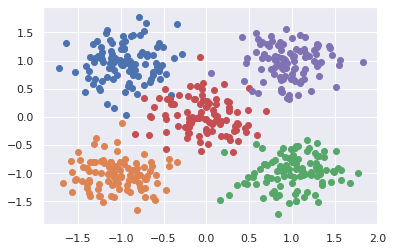

In [ ]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1]);

In [ ]:
# hot encoding:
y_cat= to_categorical(y,5)

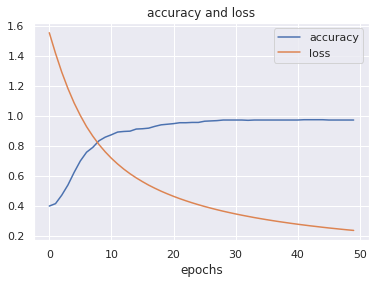

In [ ]:
model = Sequential()
model.add(Dense(units=5,input_shape=(2,),activation='softmax'))

model.compile(Adam(learning_rate=LR) ,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
h=model.fit(x=X,y=y_cat,
            verbose=0,
            batch_size=BS,
            epochs=EP,
            shuffle = 'true')
plot_controlgraphs(h)

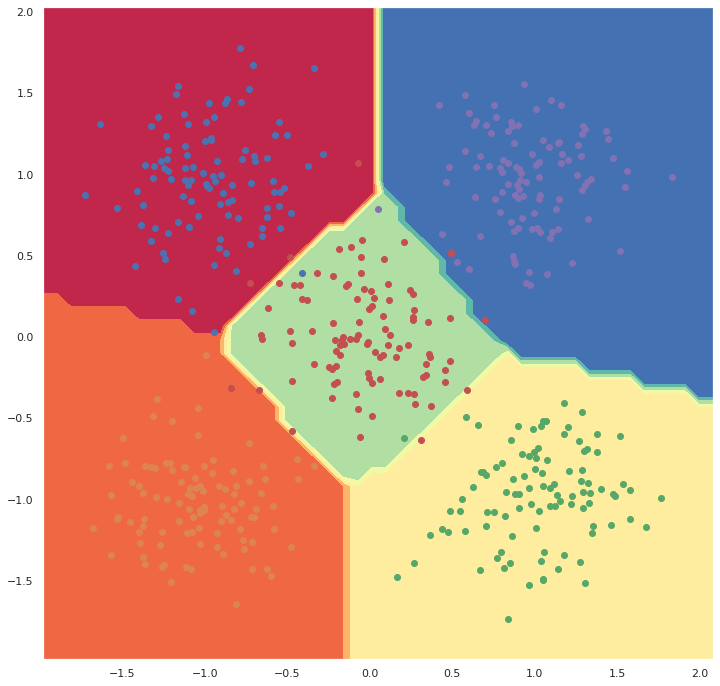

In [ ]:
_, ax = plt.subplots(figsize=(12,12))
plot_decision_boundary(X, y_cat, model, tol=0.25)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1]);

Prediction is class [4]


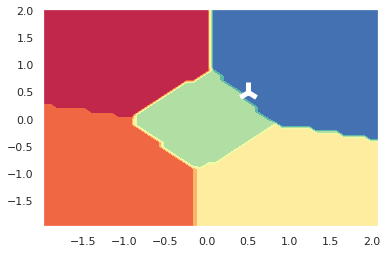

In [ ]:
# check a input:
x=.5
y=.5
pt = np.array([[x,y]])
pred=np.argmax(model.predict(pt), axis=-1)
#_, ax = plt.subplots(figsize=(12,12))
plot_decision_boundary(X, y_cat, model, tol=0.25)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])
plt.plot([x],[y],'2',c='w', mew=5, ms=20)

print(f'Prediction is class {pred}')